# Evaluation of the Ratio & Normalized Cut Values

In [47]:
%load_ext autoreload
%autoreload 2

import os
import pickle
import numpy as np
from experiment_utils import compute_descriptors_from_file, compute_knn, compute_ratio_cut, compute_normalized_cut, \
    plot_evaluation
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
df = compute_descriptors_from_file("proteins")
labels = df['labels']

## Across K Performance

In [49]:
file = "proteins"
rotated = False

In [50]:
descriptors = [
    ['evrap', 'samp_3d', 'sirm_3d', 'scomp_3d'], ['pfh'], ['sector_model'], ['combined_model'], ['shell_model'],
    ['evrap'], ['samp_3d'], ['sirm_3d'], ['scomp_3d']
]
k_values = range(2, 26)
knn_types = ['mutual', 'symmetric']

In [51]:
plot_data = {
    knn_type: {
        metric: {'_'.join(descriptor): [] for descriptor in descriptors}
        for metric in ['ratio_cut', 'normalized_cut']
    }
    for knn_type in knn_types
}

pickle_file_per_k = f'test_output/{file}_ratio_normalized_per_k{"_rotated" if rotated else ""}.pkl'
if os.path.isfile(pickle_file_per_k):
    with open(pickle_file_per_k, 'rb') as f:
        plot_data = pickle.load(f)
else:
    for k in k_values:
        for knn_type in knn_types:
            for descriptor in descriptors:
                knn_graph = compute_knn(df, descriptor_list=descriptor, n_neighbors=k, variant=knn_type)
                n_clusters = len(np.unique(labels))

                ratio_cut = compute_ratio_cut(knn_graph, labels)
                normalized_cut = compute_normalized_cut(knn_graph, labels)

                plot_data[knn_type]['ratio_cut']['_'.join(descriptor)].append(ratio_cut)
                plot_data[knn_type]['normalized_cut']['_'.join(descriptor)].append(normalized_cut)

    with open(pickle_file_per_k, 'wb') as f:
        pickle.dump(plot_data, f)

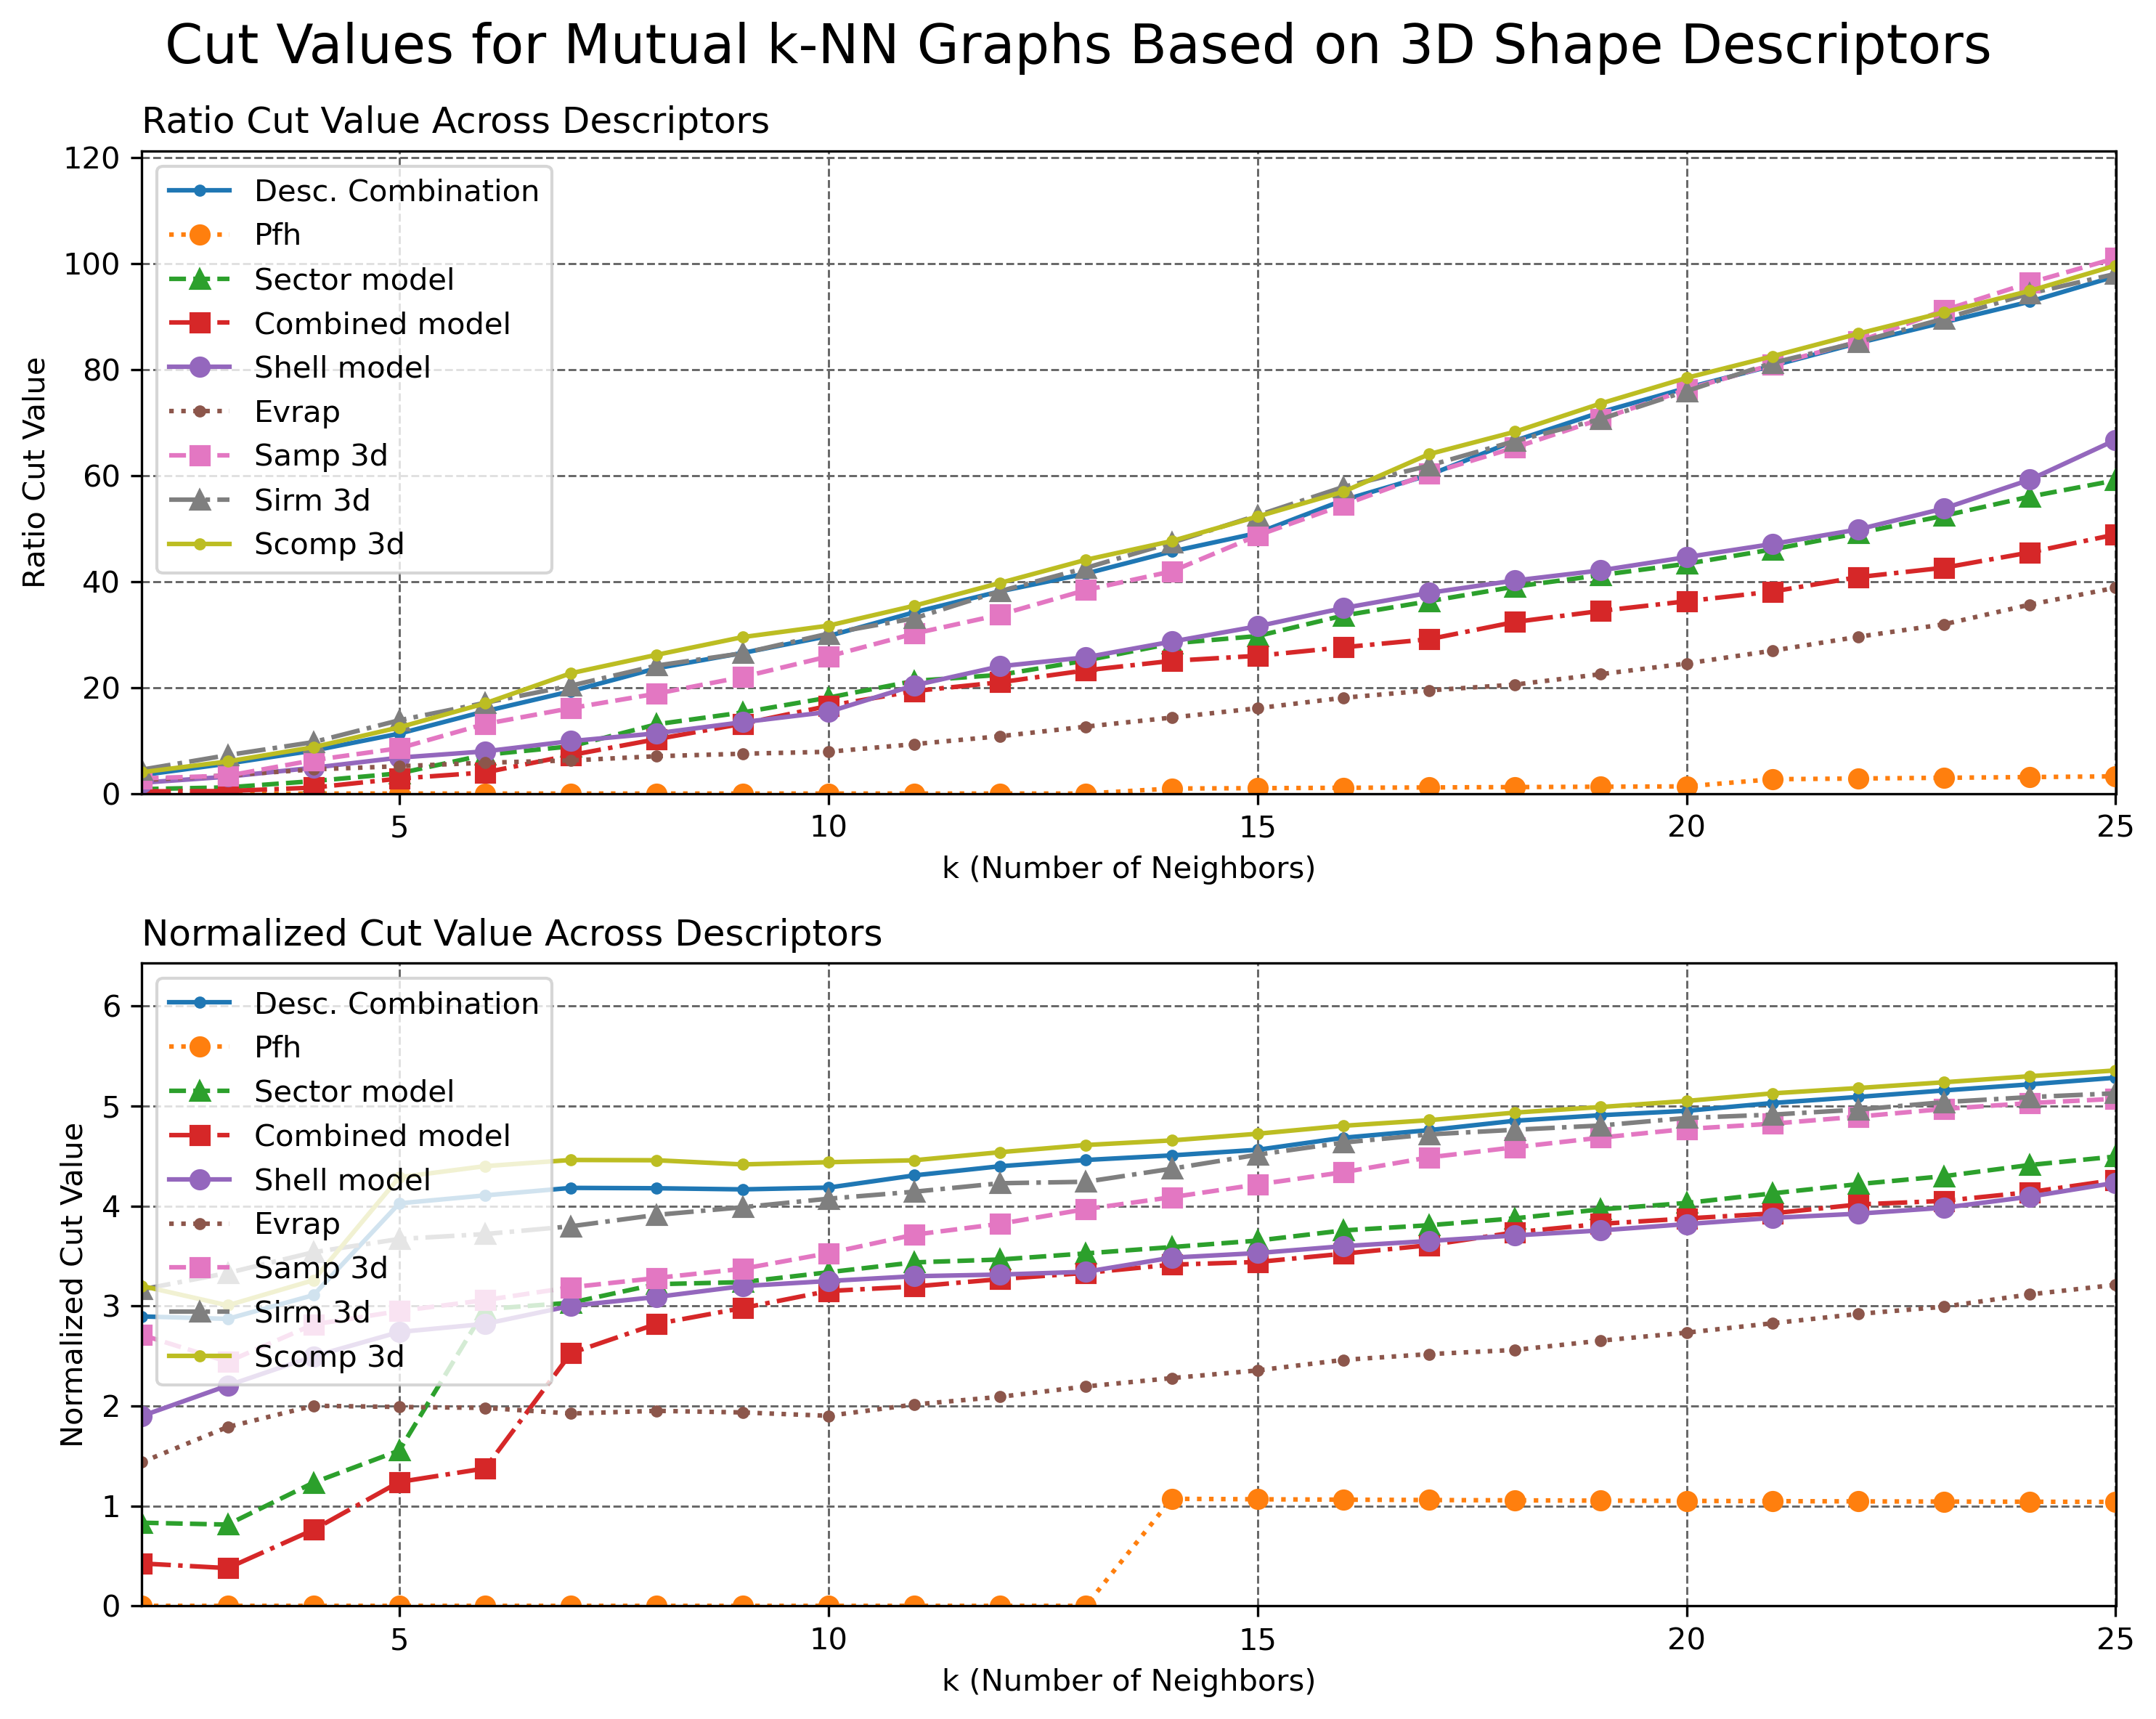

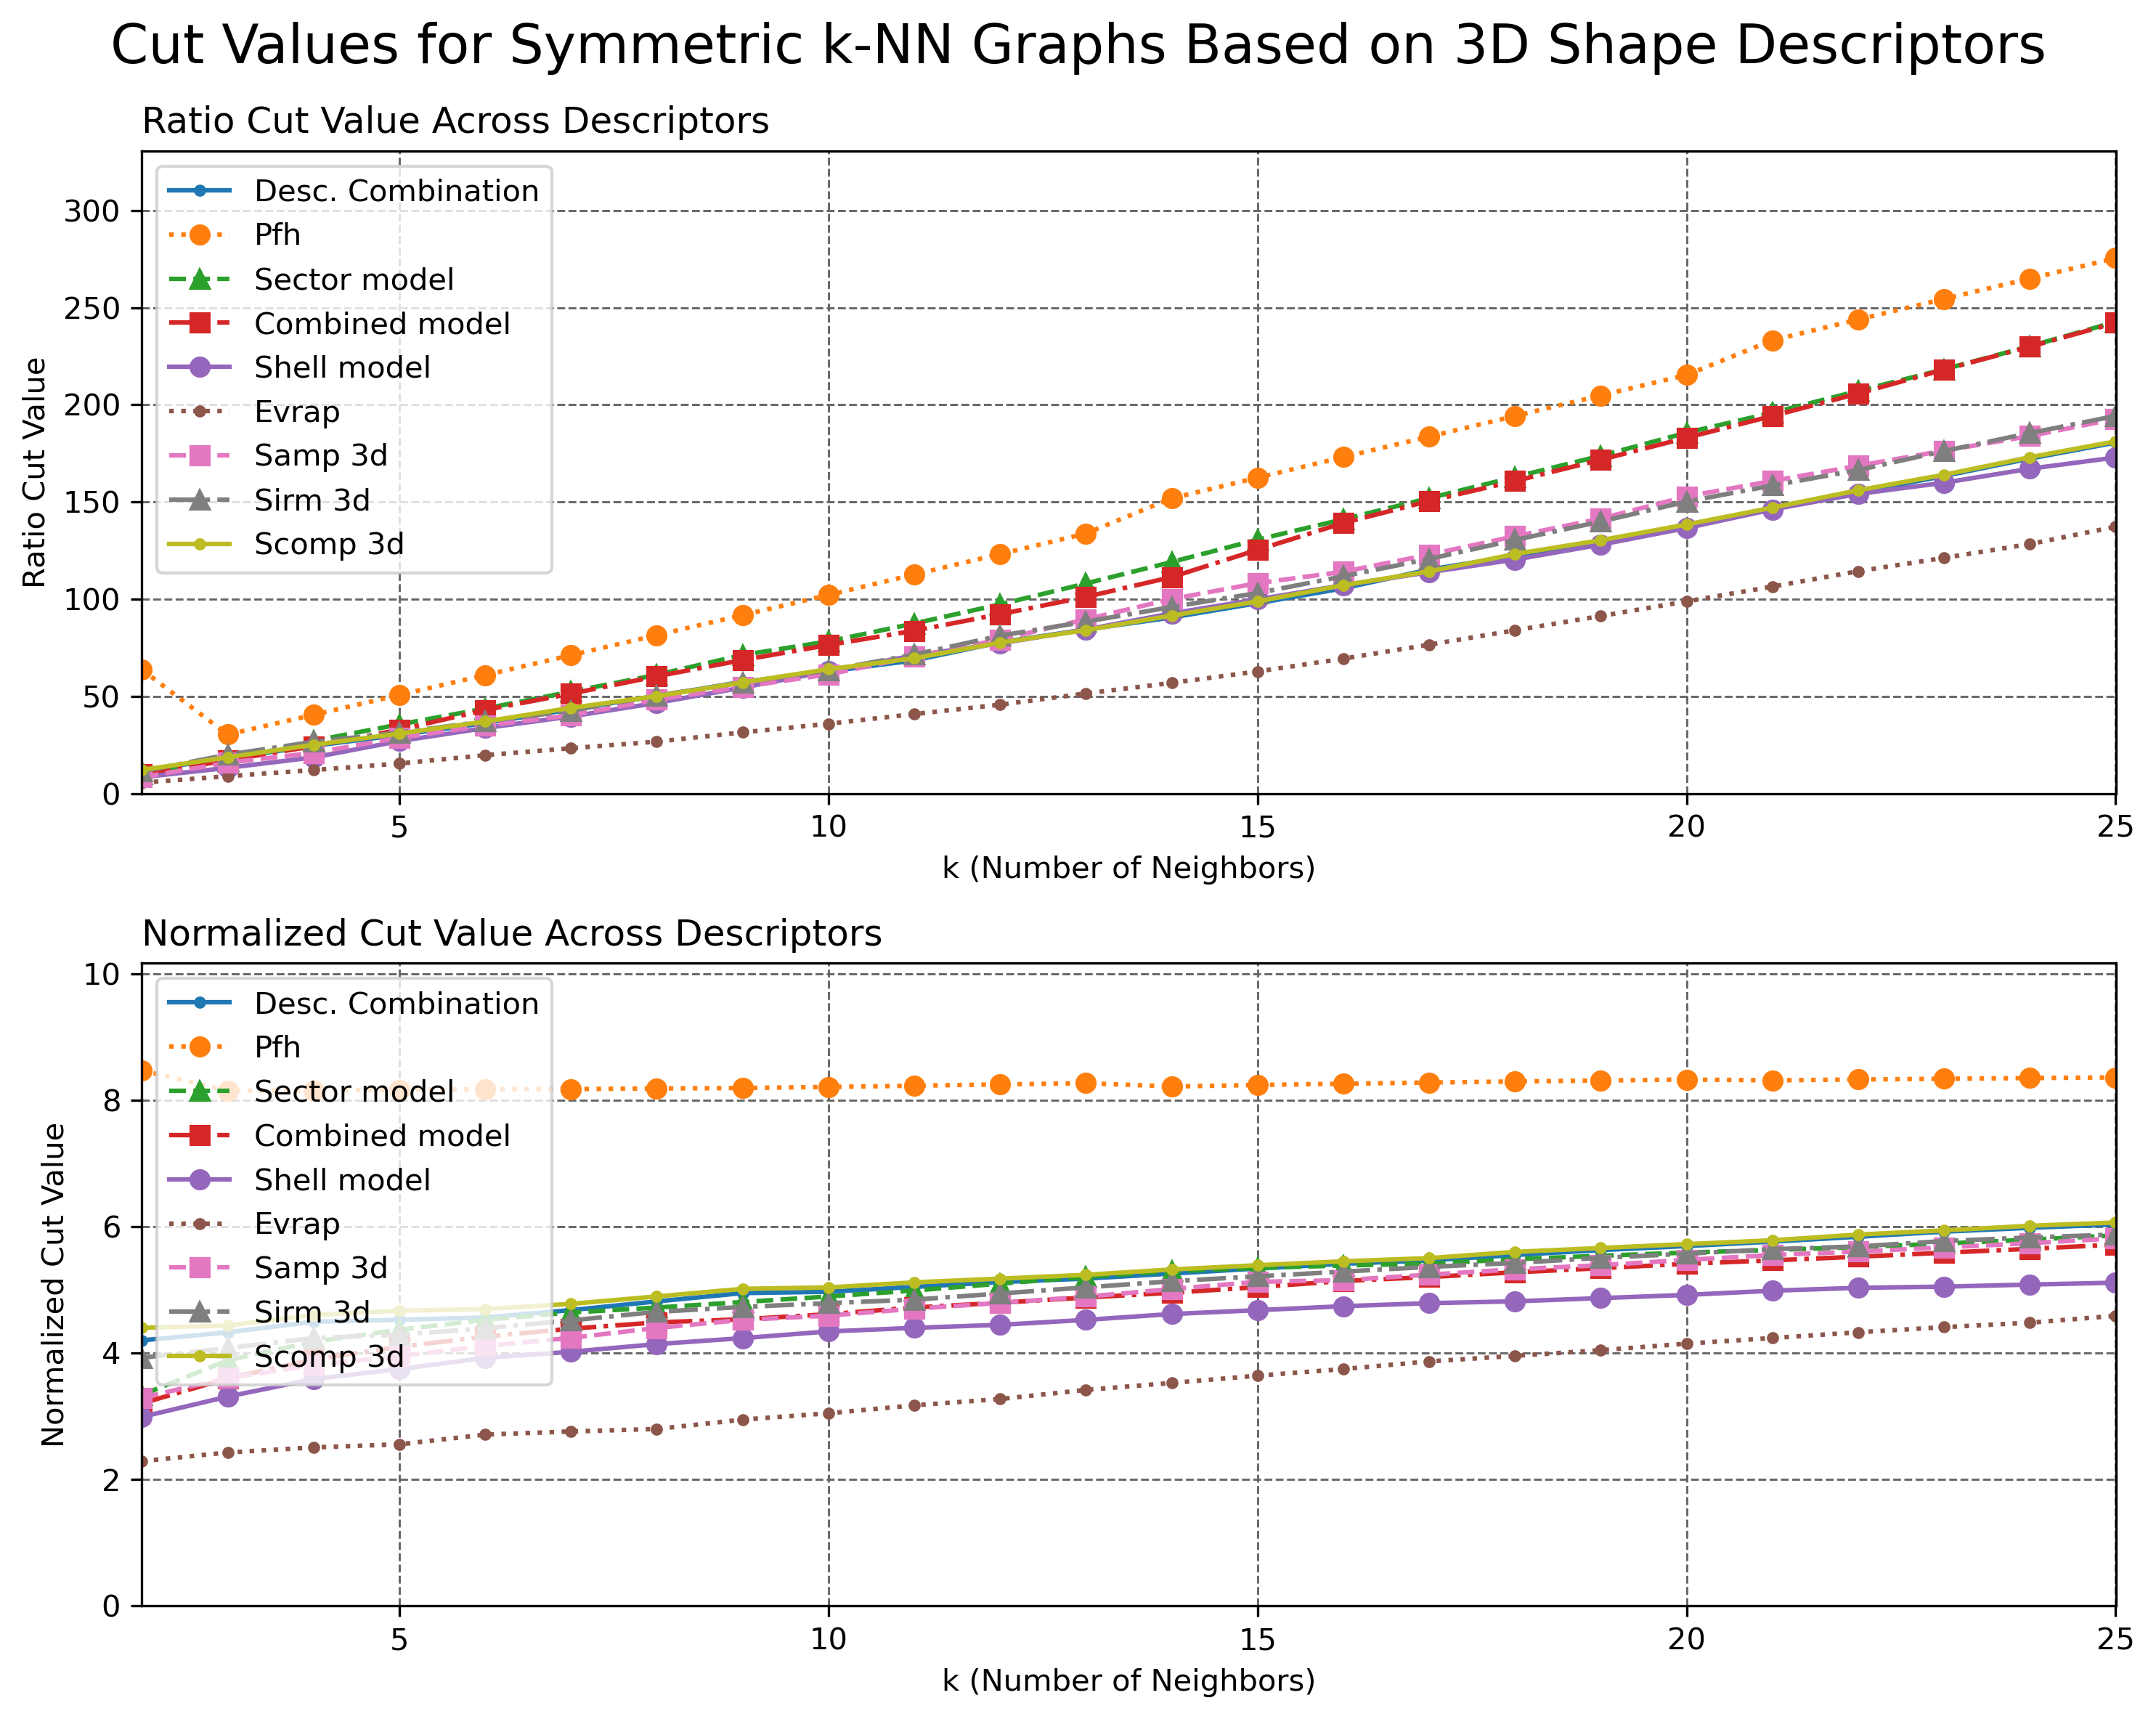

In [52]:
descriptors = [
    ['evrap', 'samp_3d', 'sirm_3d', 'scomp_3d'], ['pfh'], ['sector_model'], ['combined_model'], ['shell_model'],
    ['evrap'], ['samp_3d'], ['sirm_3d'], ['scomp_3d']
]
for knn_type in knn_types:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=300)  # Example with a 2x2 grid of subplots

    plot_evaluation(axes[0], descriptors, plot_data[knn_type]['ratio_cut'], k_values,
                    x_label='k (Number of Neighbors)', y_label='Ratio Cut Value',
                    title='Ratio Cut Value Across Descriptors')

    plot_evaluation(axes[1], descriptors, plot_data[knn_type]['normalized_cut'], k_values,
                    x_label='k (Number of Neighbors)', y_label='Normalized Cut Value',
                    title='Normalized Cut Value Across Descriptors')

    fig.suptitle(f"Cut Values for {knn_type.capitalize()} k-NN Graphs Based on 3D Shape Descriptors",
                 color="black", fontsize=18)

    fig.patch.set_facecolor('#FFFFFF')
    fig.tight_layout()

    plt.savefig(
        f'figures/{file}/ratio_normalized_cut_values/{knn_type}_ratio_normalized_cut_per_k{"_rotated" if rotated else ""}.png',
        dpi=300)
    plt.show()

# Reduced d Performance

In [53]:
MAX_DIM = 20  # the maximum dimensionality is 36, a property of the combined model
descriptors = [
    ['evrap', 'samp_3d', 'sirm_3d', 'scomp_3d'], ['pfh'], ['sector_model'], ['combined_model'], ['shell_model'],
    ['evrap'], ['samp_3d'], ['sirm_3d'], ['scomp_3d']
]
d_values = range(1, MAX_DIM)
knn_types = ['mutual', 'symmetric']

In [54]:
plot_data = {
    knn_type: {
        metric: {'_'.join(descriptor): [] for descriptor in descriptors}
        for metric in ['ratio_cut', 'normalized_cut']
    }
    for knn_type in knn_types
}
pickle_file_reduced_d = f'test_output/{file}_ratio_normalized_reduced_d{"_rotated" if rotated else ""}.pkl'
if os.path.isfile(pickle_file_reduced_d):
    with open(pickle_file_reduced_d, 'rb') as f:
        plot_data = pickle.load(f)
else:
    for dim in d_values:
        for knn_variant in ['symmetric', 'mutual']:
            for descriptor in descriptors:
                knn_graph_data = compute_knn(df, descriptor_list=descriptor, n_neighbors=15, variant=knn_variant,
                                             pca=True, pca_dim=dim)
                n_clusters = len(np.unique(labels))

                ratio_cut = compute_ratio_cut(knn_graph_data, labels)
                normalized_cut = compute_normalized_cut(knn_graph_data, labels)

                plot_data[knn_variant]['ratio_cut']['_'.join(descriptor)].append(ratio_cut)
                plot_data[knn_variant]['normalized_cut']['_'.join(descriptor)].append(normalized_cut)

    with open(pickle_file_reduced_d, 'wb') as f:
        pickle.dump(plot_data, f)

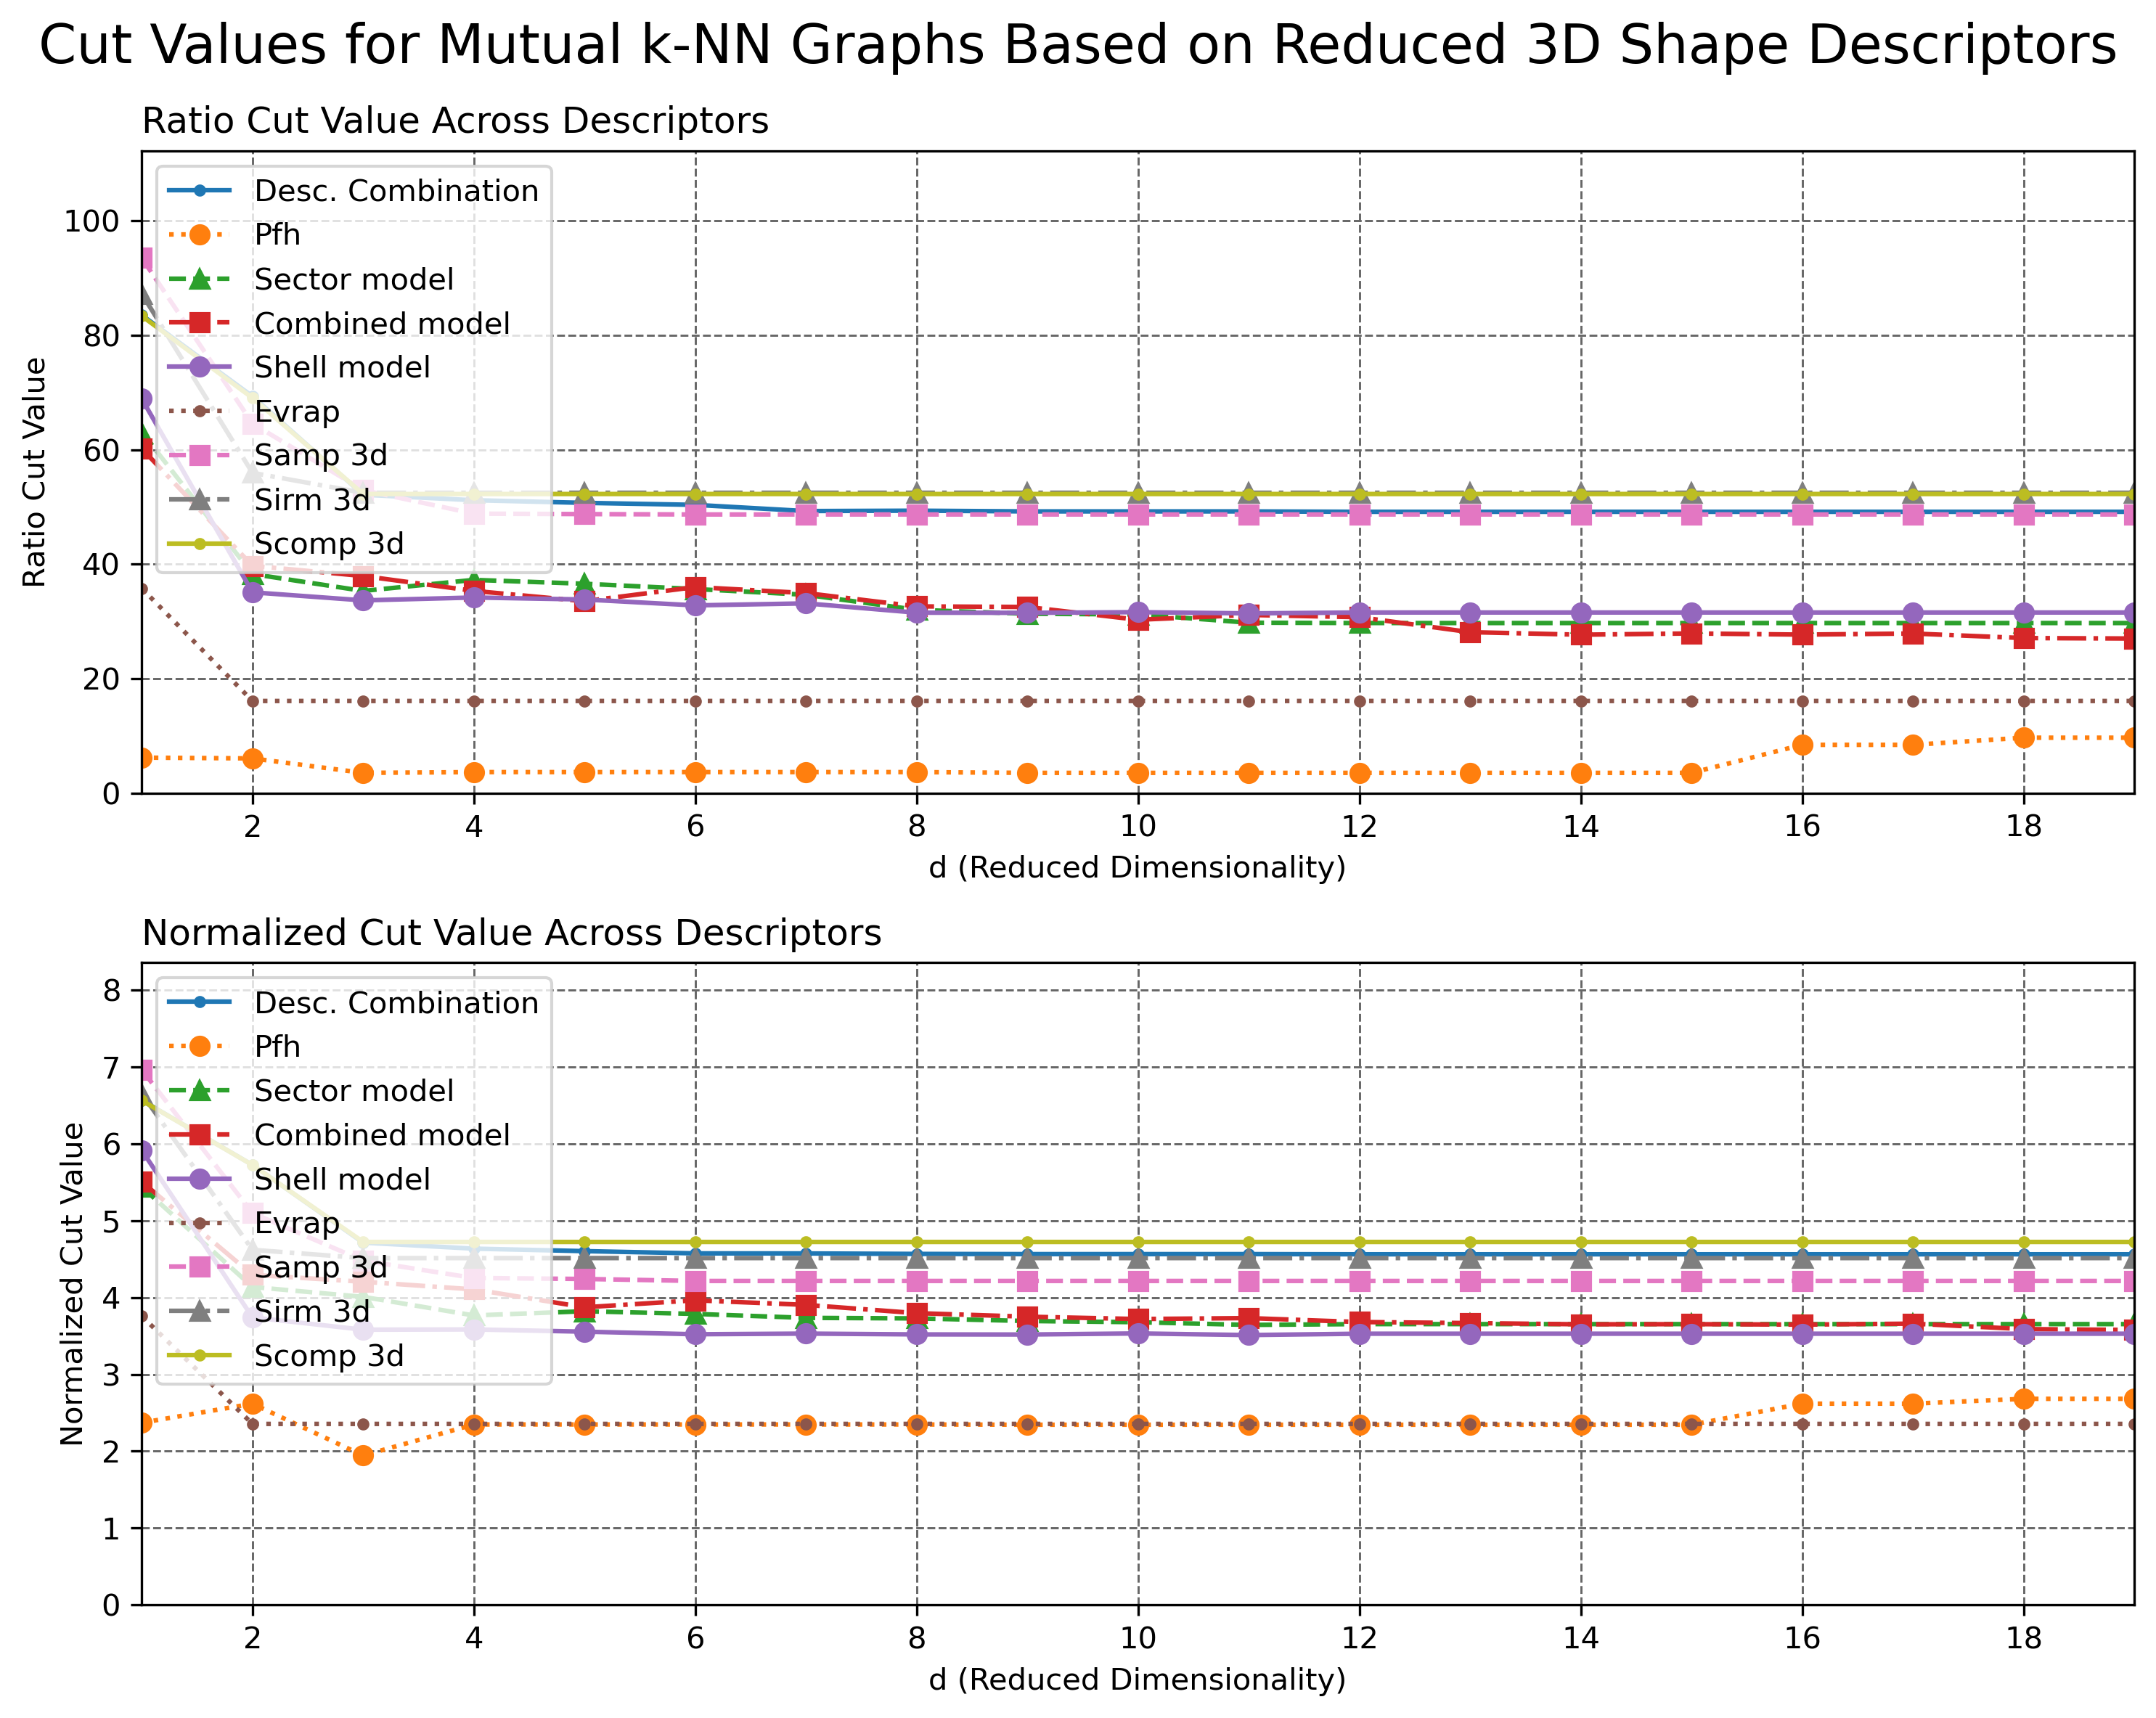

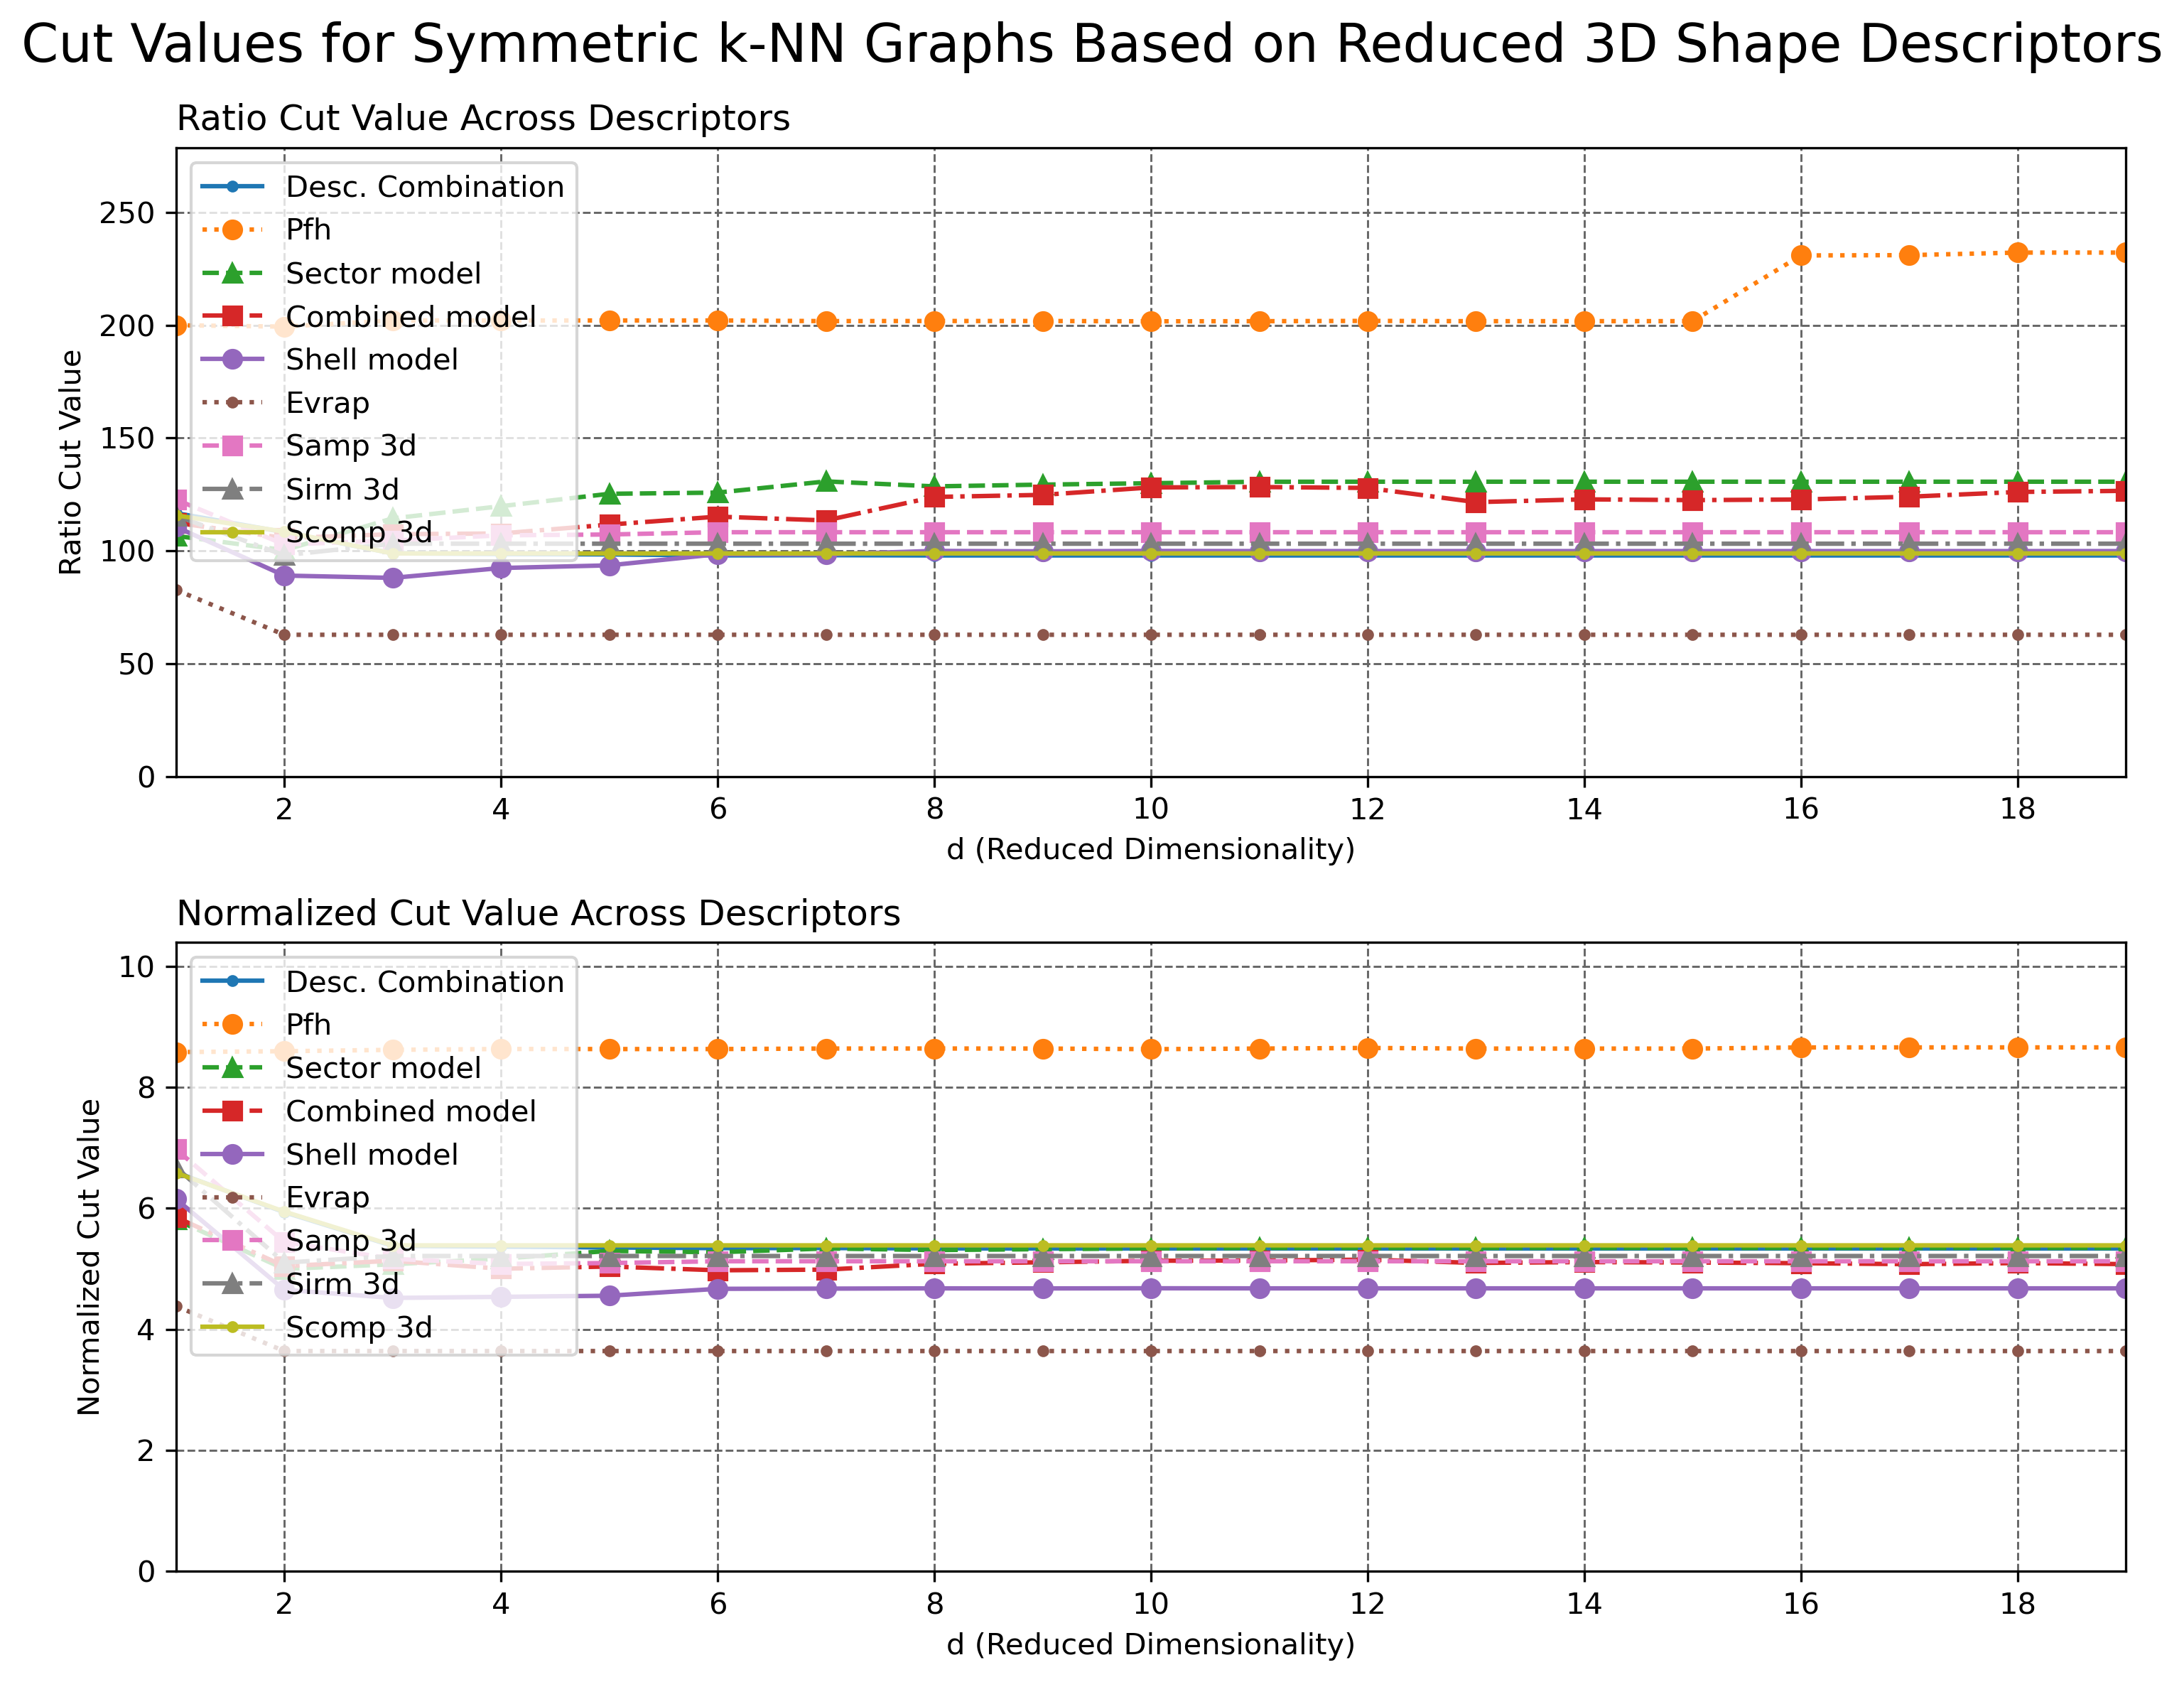

In [55]:
for knn_type in knn_types:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=300)

    plot_evaluation(axes[0], descriptors, plot_data[knn_type]['ratio_cut'], d_values,
                    x_label='d (Reduced Dimensionality)', y_label='Ratio Cut Value',
                    title='Ratio Cut Value Across Descriptors')

    plot_evaluation(axes[1], descriptors, plot_data[knn_type]['normalized_cut'], d_values,
                    x_label='d (Reduced Dimensionality)', y_label='Normalized Cut Value',
                    title='Normalized Cut Value Across Descriptors')

    fig.suptitle(f"Cut Values for {knn_type.capitalize()} k-NN Graphs Based on Reduced 3D Shape Descriptors",
                 color="black", fontsize=18)

    fig.patch.set_facecolor('#FFFFFF')
    fig.tight_layout()

    plt.savefig(
        f'figures/{file}/ratio_normalized_cut_values/{knn_type}_ratio_normalized_cut_reduced_d{"_rotated" if rotated else ""}.png',
        dpi=300)
    plt.show()

## Rotate Objects first, Reduced d

In [56]:
rotated = True
df = compute_descriptors_from_file("proteins", rotate_random=rotated)

In [57]:
MAX_DIM = 20  # the maximum dimensionality is 36, a property of the combined model
descriptors = [
    ['evrap', 'samp_3d', 'sirm_3d', 'scomp_3d'], ['pfh'], ['sector_model'], ['combined_model'], ['shell_model'],
    ['evrap'], ['samp_3d'], ['sirm_3d'], ['scomp_3d']
]
d_values = range(1, MAX_DIM)
knn_types = ['mutual', 'symmetric']

In [58]:
plot_data = {
    knn_type: {
        metric: {'_'.join(descriptor): [] for descriptor in descriptors}
        for metric in ['ratio_cut', 'normalized_cut']
    }
    for knn_type in knn_types
}
pickle_file_reduced_d = f'test_output/{file}_ratio_normalized_reduced_d{"_rotated" if rotated else ""}.pkl'
if os.path.isfile(pickle_file_reduced_d):
    with open(pickle_file_reduced_d, 'rb') as f:
        plot_data = pickle.load(f)
else:
    for dim in d_values:
        for knn_variant in ['symmetric', 'mutual']:
            for descriptor in descriptors:
                knn_graph_data = compute_knn(df, descriptor_list=descriptor, n_neighbors=15, variant=knn_variant,
                                             pca=True, pca_dim=dim)
                n_clusters = len(np.unique(labels))

                ratio_cut = compute_ratio_cut(knn_graph_data, labels)
                normalized_cut = compute_normalized_cut(knn_graph_data, labels)

                plot_data[knn_variant]['ratio_cut']['_'.join(descriptor)].append(ratio_cut)
                plot_data[knn_variant]['normalized_cut']['_'.join(descriptor)].append(normalized_cut)

    with open(pickle_file_reduced_d, 'wb') as f:
        pickle.dump(plot_data, f)

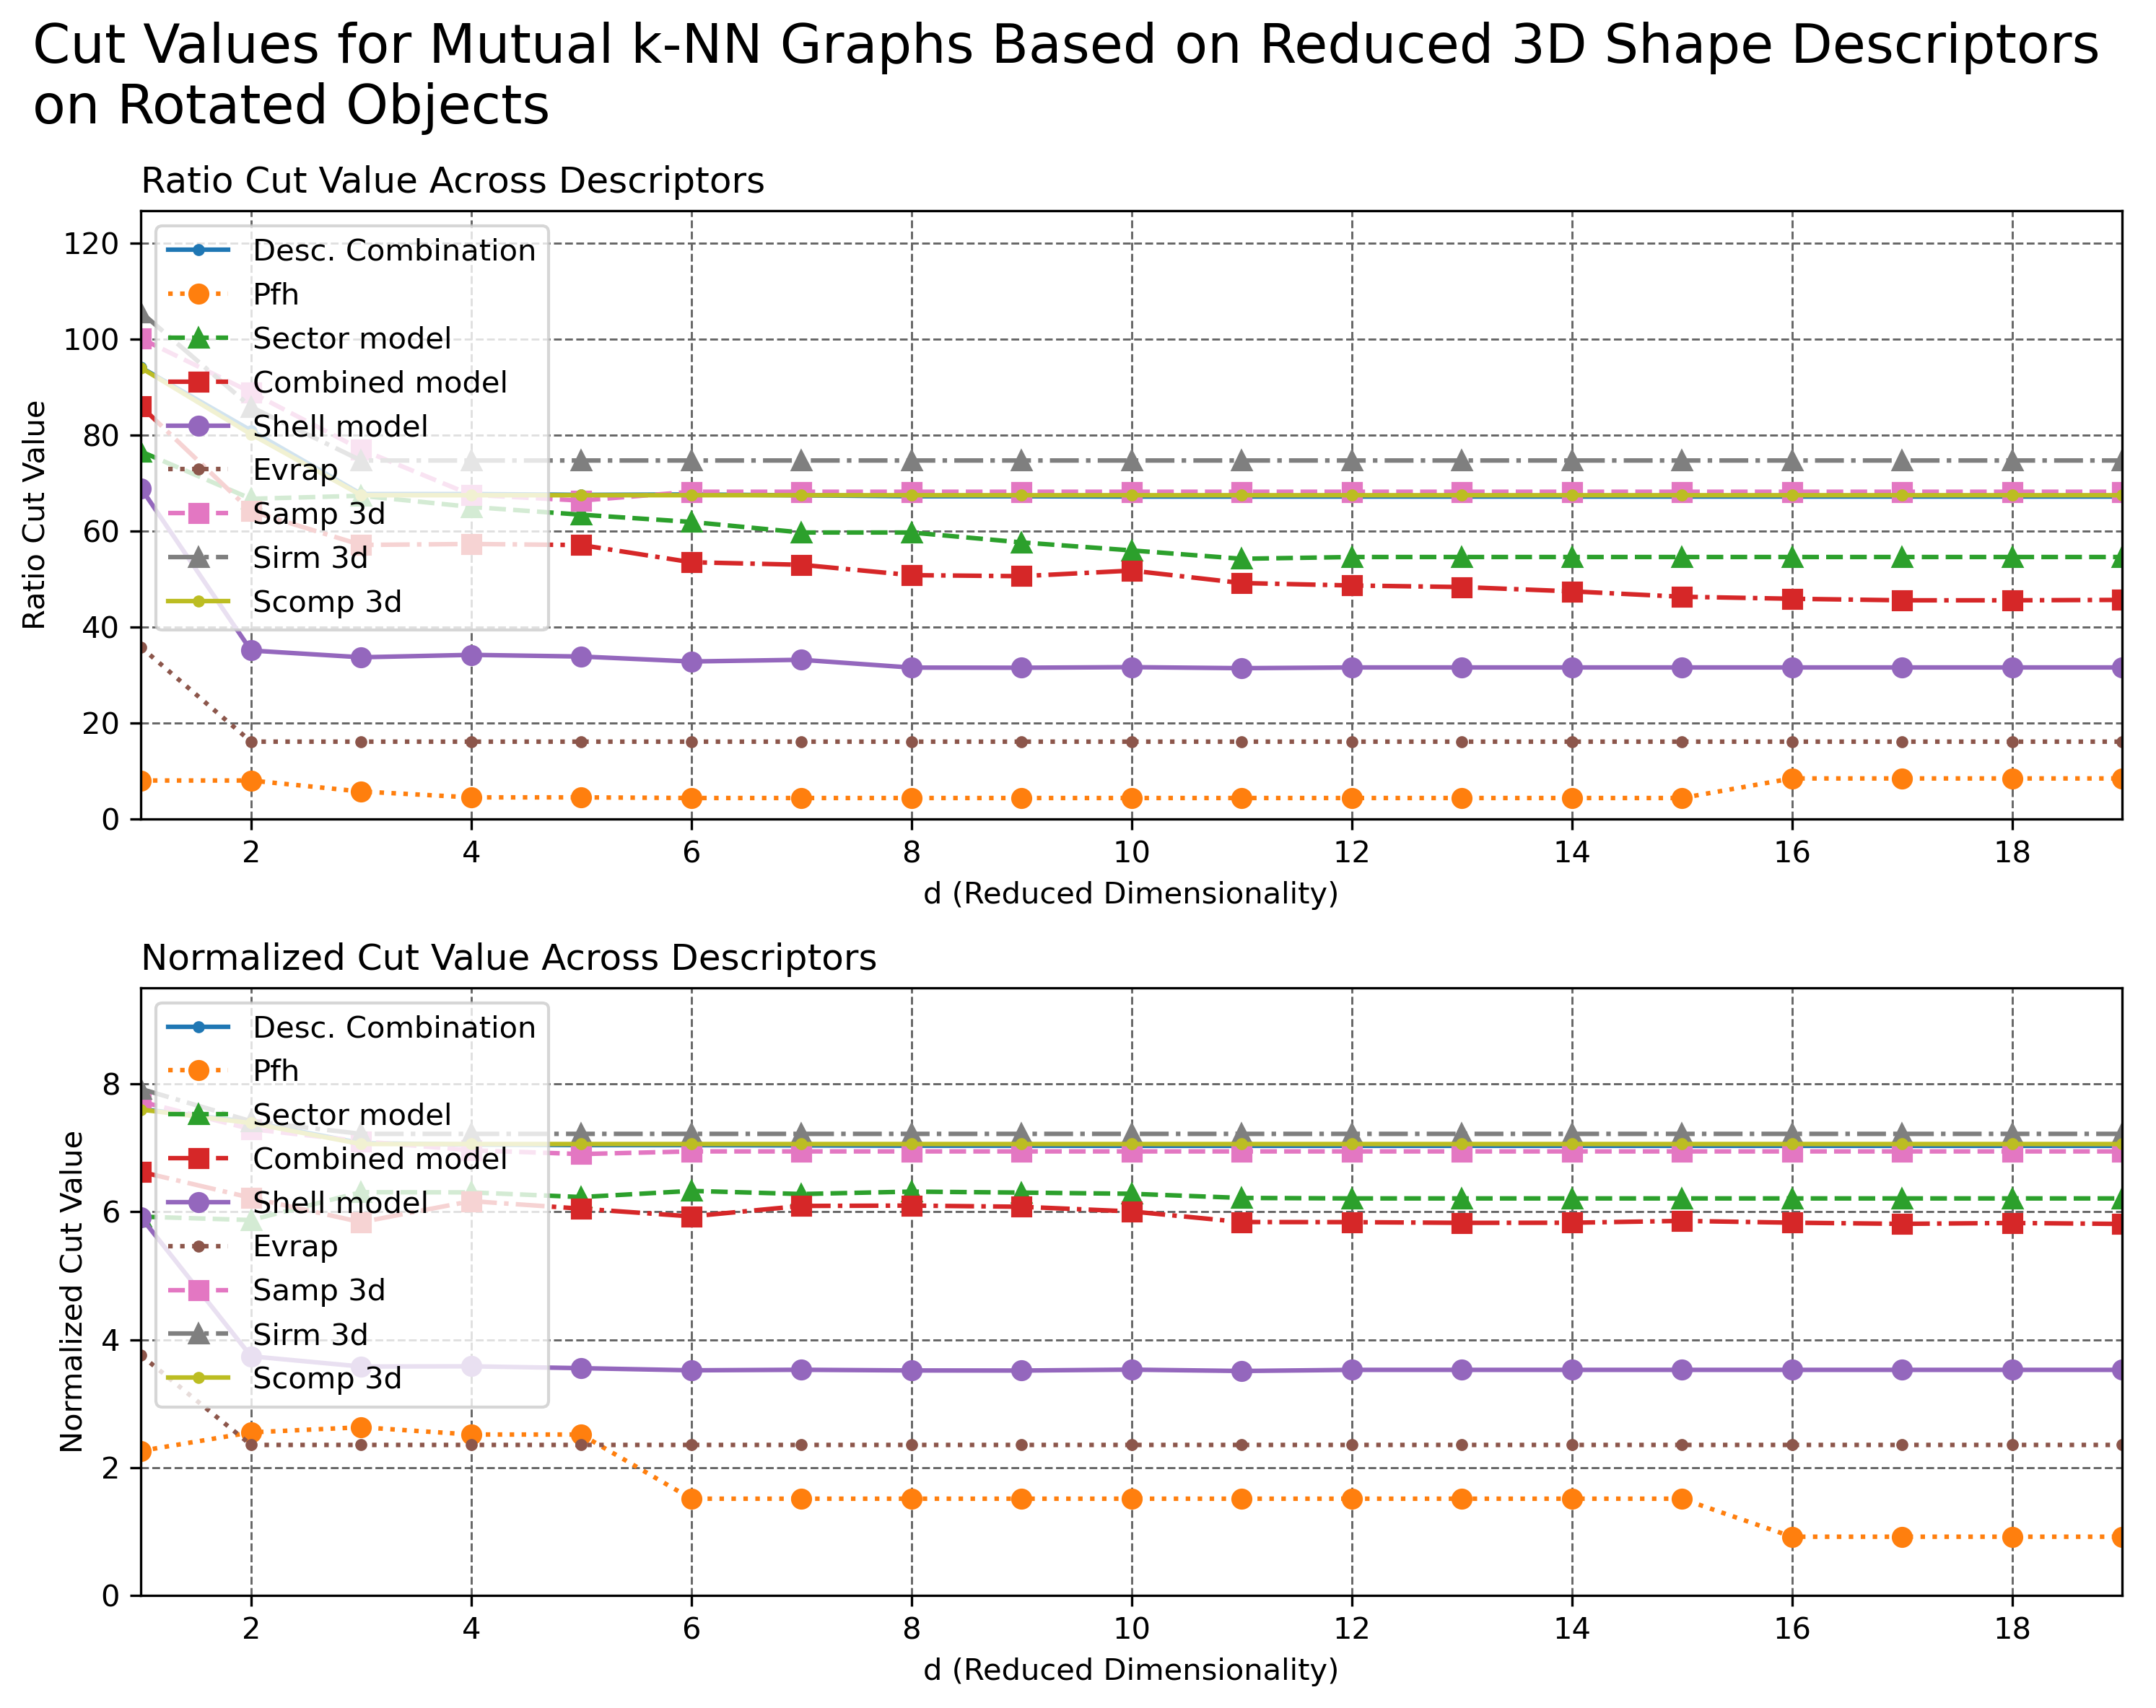

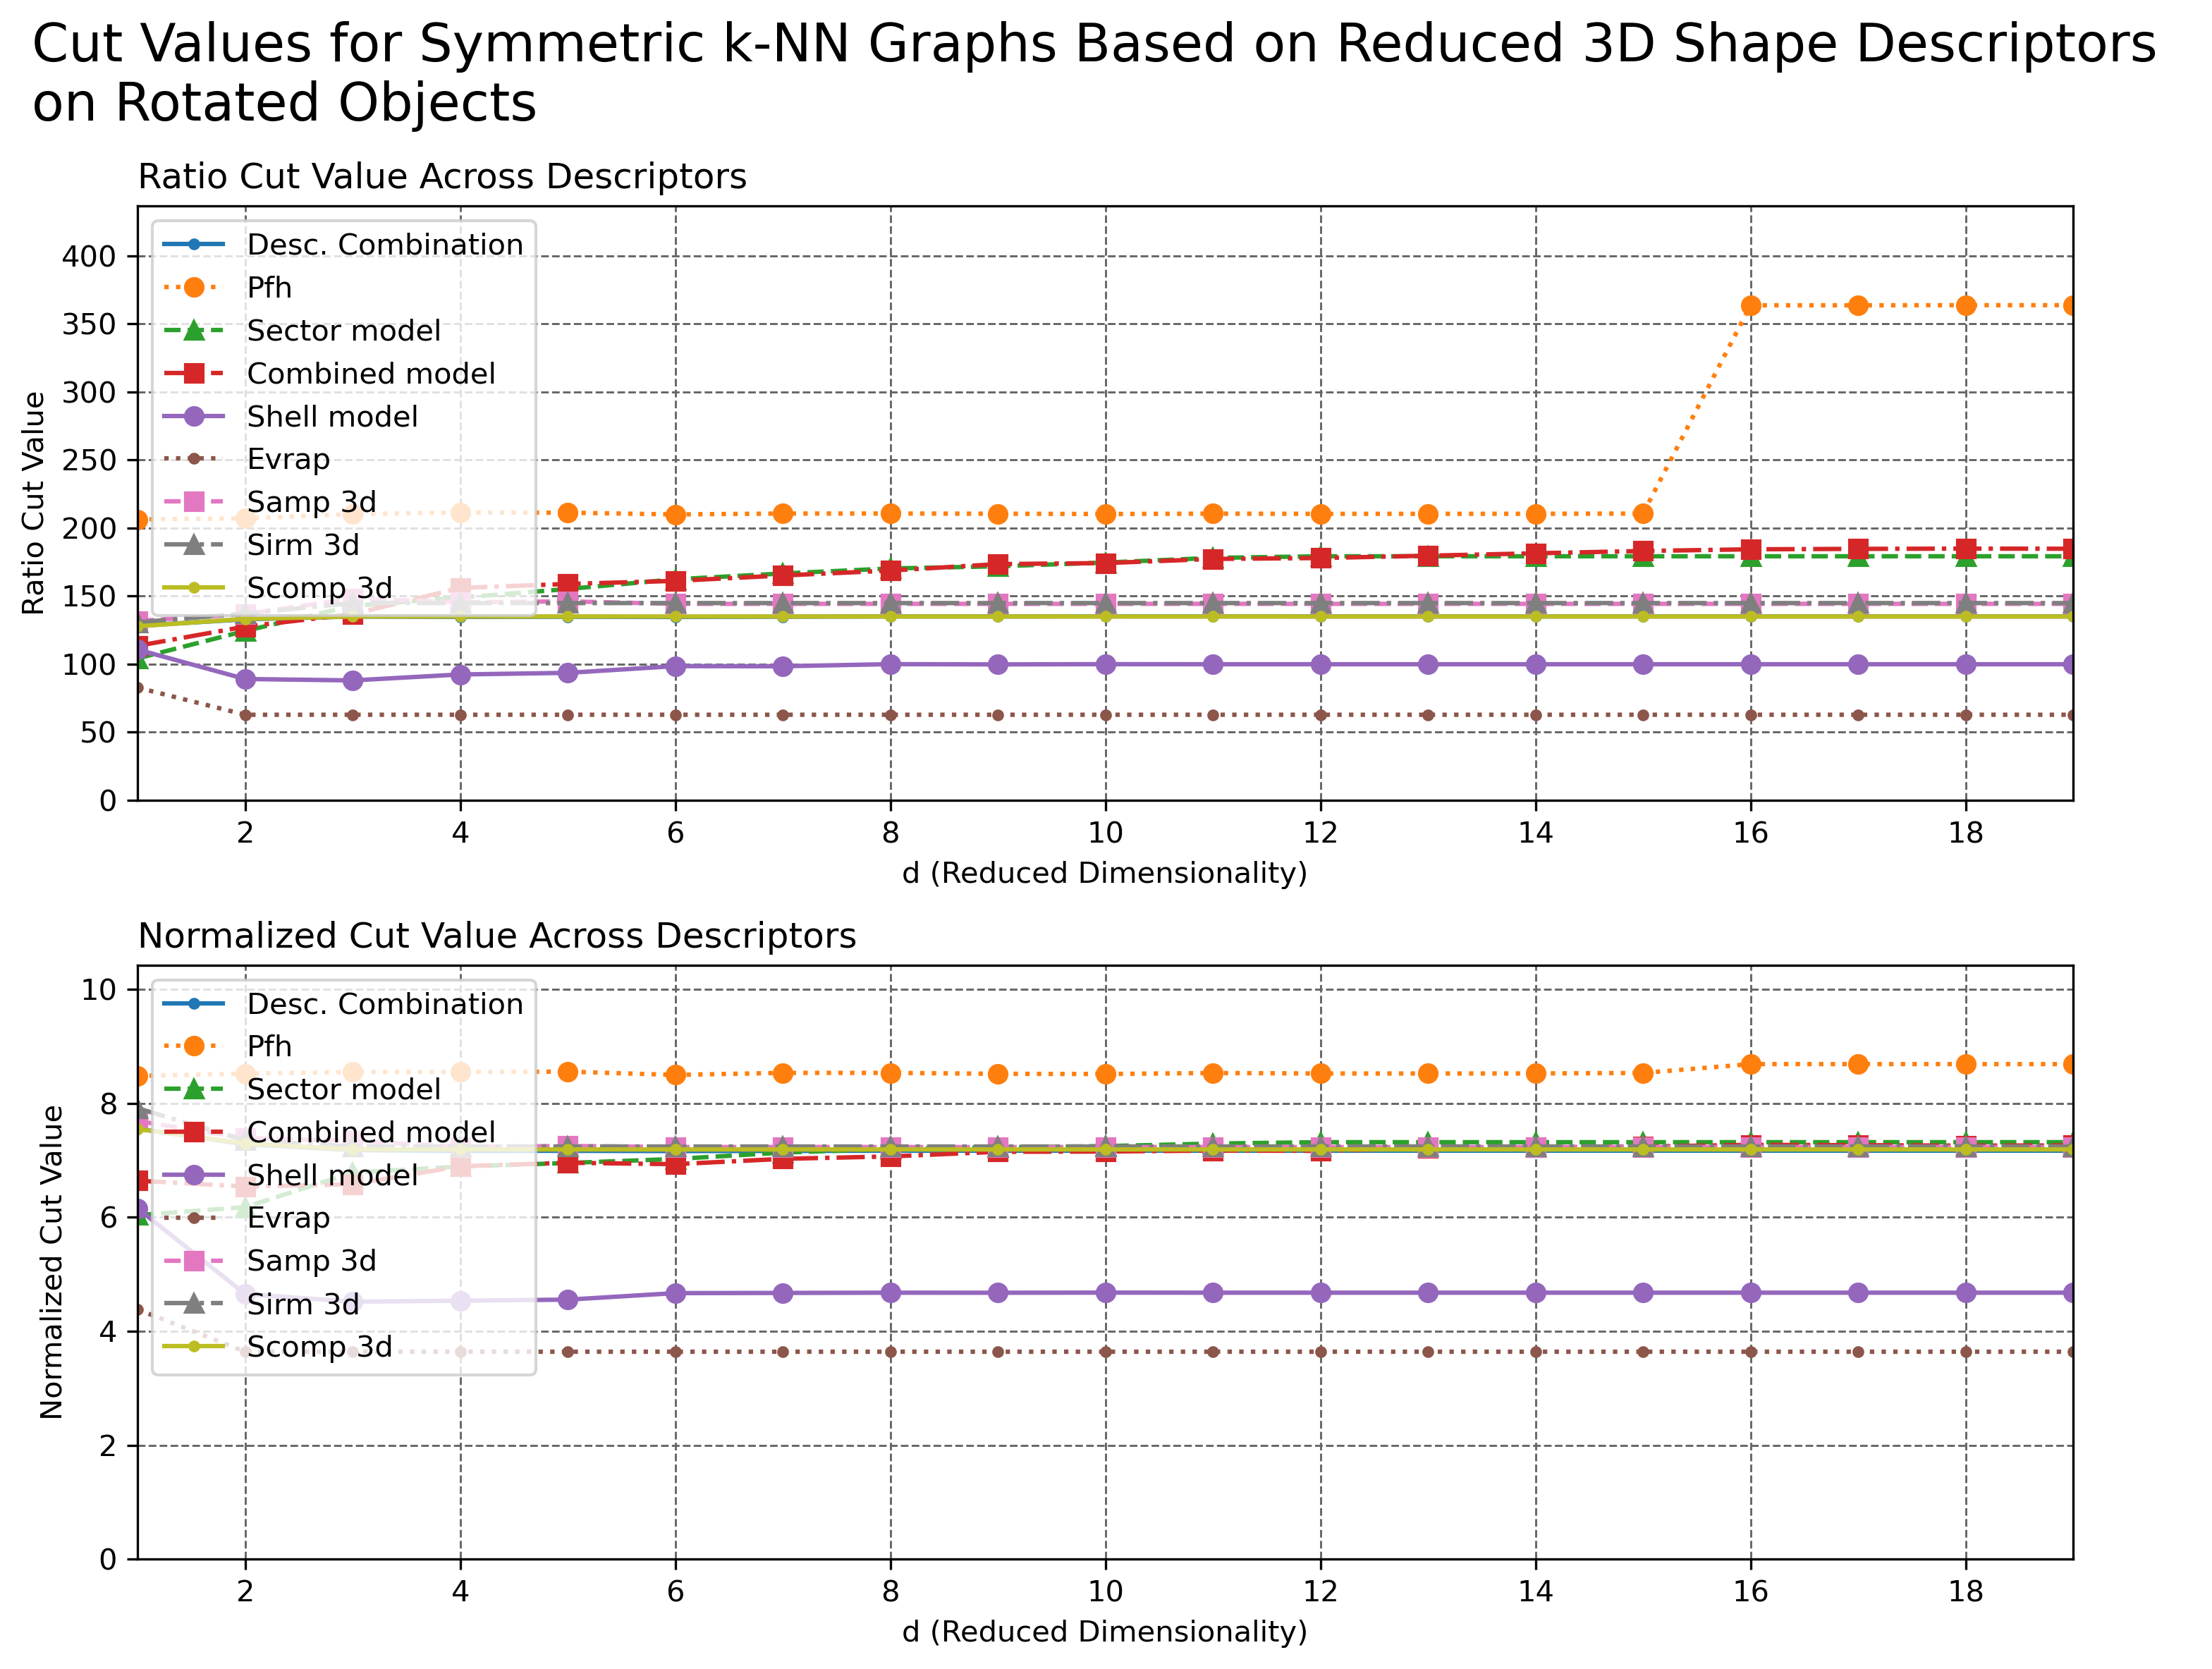

In [59]:
for knn_type in knn_types:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=300)

    plot_evaluation(axes[0], descriptors, plot_data[knn_type]['ratio_cut'], d_values,
                    x_label='d (Reduced Dimensionality)', y_label='Ratio Cut Value',
                    title='Ratio Cut Value Across Descriptors')

    plot_evaluation(axes[1], descriptors, plot_data[knn_type]['normalized_cut'], d_values,
                    x_label='d (Reduced Dimensionality)', y_label='Normalized Cut Value',
                    title='Normalized Cut Value Across Descriptors')

    fig.suptitle(f"Cut Values for {knn_type.capitalize()} k-NN Graphs Based on Reduced 3D Shape Descriptors  \non Rotated Objects",
                 color="black", fontsize=18, horizontalalignment='left', x=0.02)

    fig.patch.set_facecolor('#FFFFFF')
    fig.tight_layout()

    plt.savefig(
        f'figures/{file}/ratio_normalized_cut_values/{knn_type}_ratio_normalized_cut_reduced_d{"_rotated" if rotated else ""}.png',
        dpi=300)
    plt.show()

## Rotate Objects first, per k

In [60]:
descriptors = [
    ['evrap', 'samp_3d', 'sirm_3d', 'scomp_3d'], ['pfh'], ['sector_model'], ['combined_model'], ['shell_model'],
    ['evrap'], ['samp_3d'], ['sirm_3d'], ['scomp_3d']
]
k_values = range(2, 26)
knn_types = ['mutual', 'symmetric']

In [61]:
plot_data = {
    knn_type: {
        metric: {'_'.join(descriptor): [] for descriptor in descriptors}
        for metric in ['ratio_cut', 'normalized_cut']
    }
    for knn_type in knn_types
}

pickle_file_per_k = f'test_output/{file}_ratio_normalized_per_k{"_rotated" if rotated else ""}.pkl'
if os.path.isfile(pickle_file_per_k):
    with open(pickle_file_per_k, 'rb') as f:
        plot_data = pickle.load(f)
else:
    for k in k_values:
        for knn_type in knn_types:
            for descriptor in descriptors:
                knn_graph = compute_knn(df, descriptor_list=descriptor, n_neighbors=k, variant=knn_type)
                n_clusters = len(np.unique(labels))

                ratio_cut = compute_ratio_cut(knn_graph, labels)
                normalized_cut = compute_normalized_cut(knn_graph, labels)

                plot_data[knn_type]['ratio_cut']['_'.join(descriptor)].append(ratio_cut)
                plot_data[knn_type]['normalized_cut']['_'.join(descriptor)].append(normalized_cut)

    with open(pickle_file_per_k, 'wb') as f:
        pickle.dump(plot_data, f)

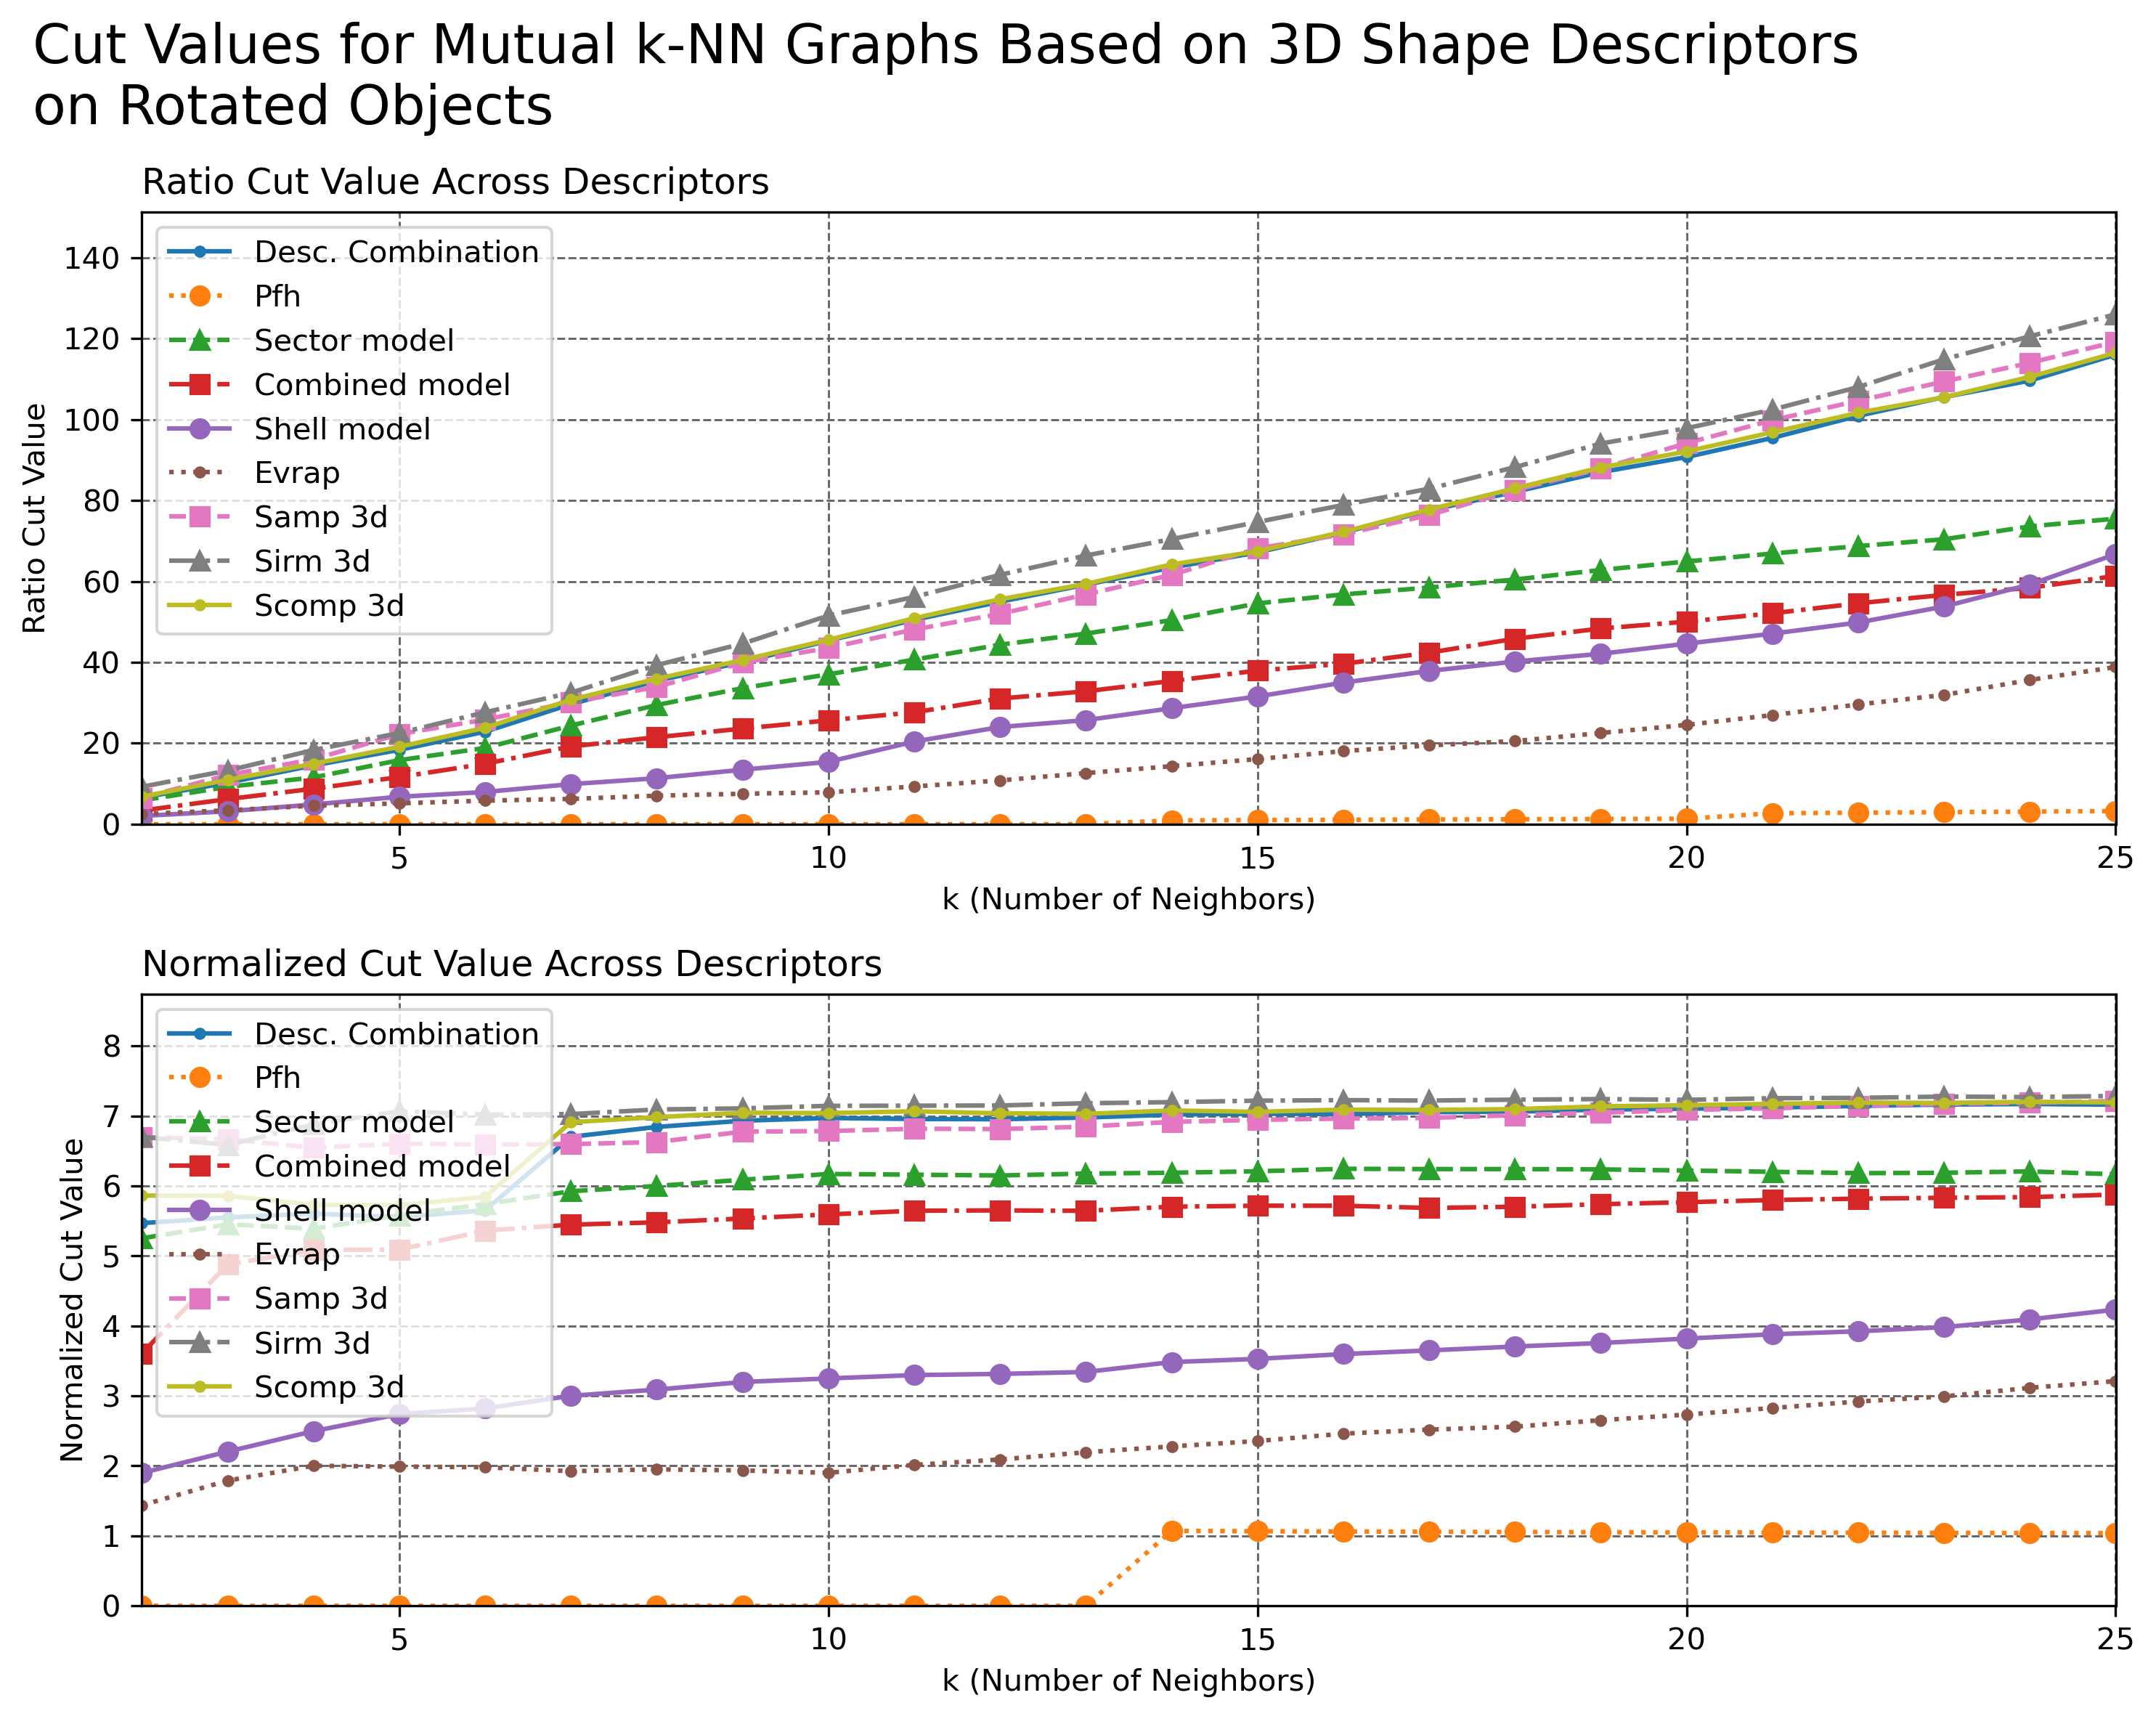

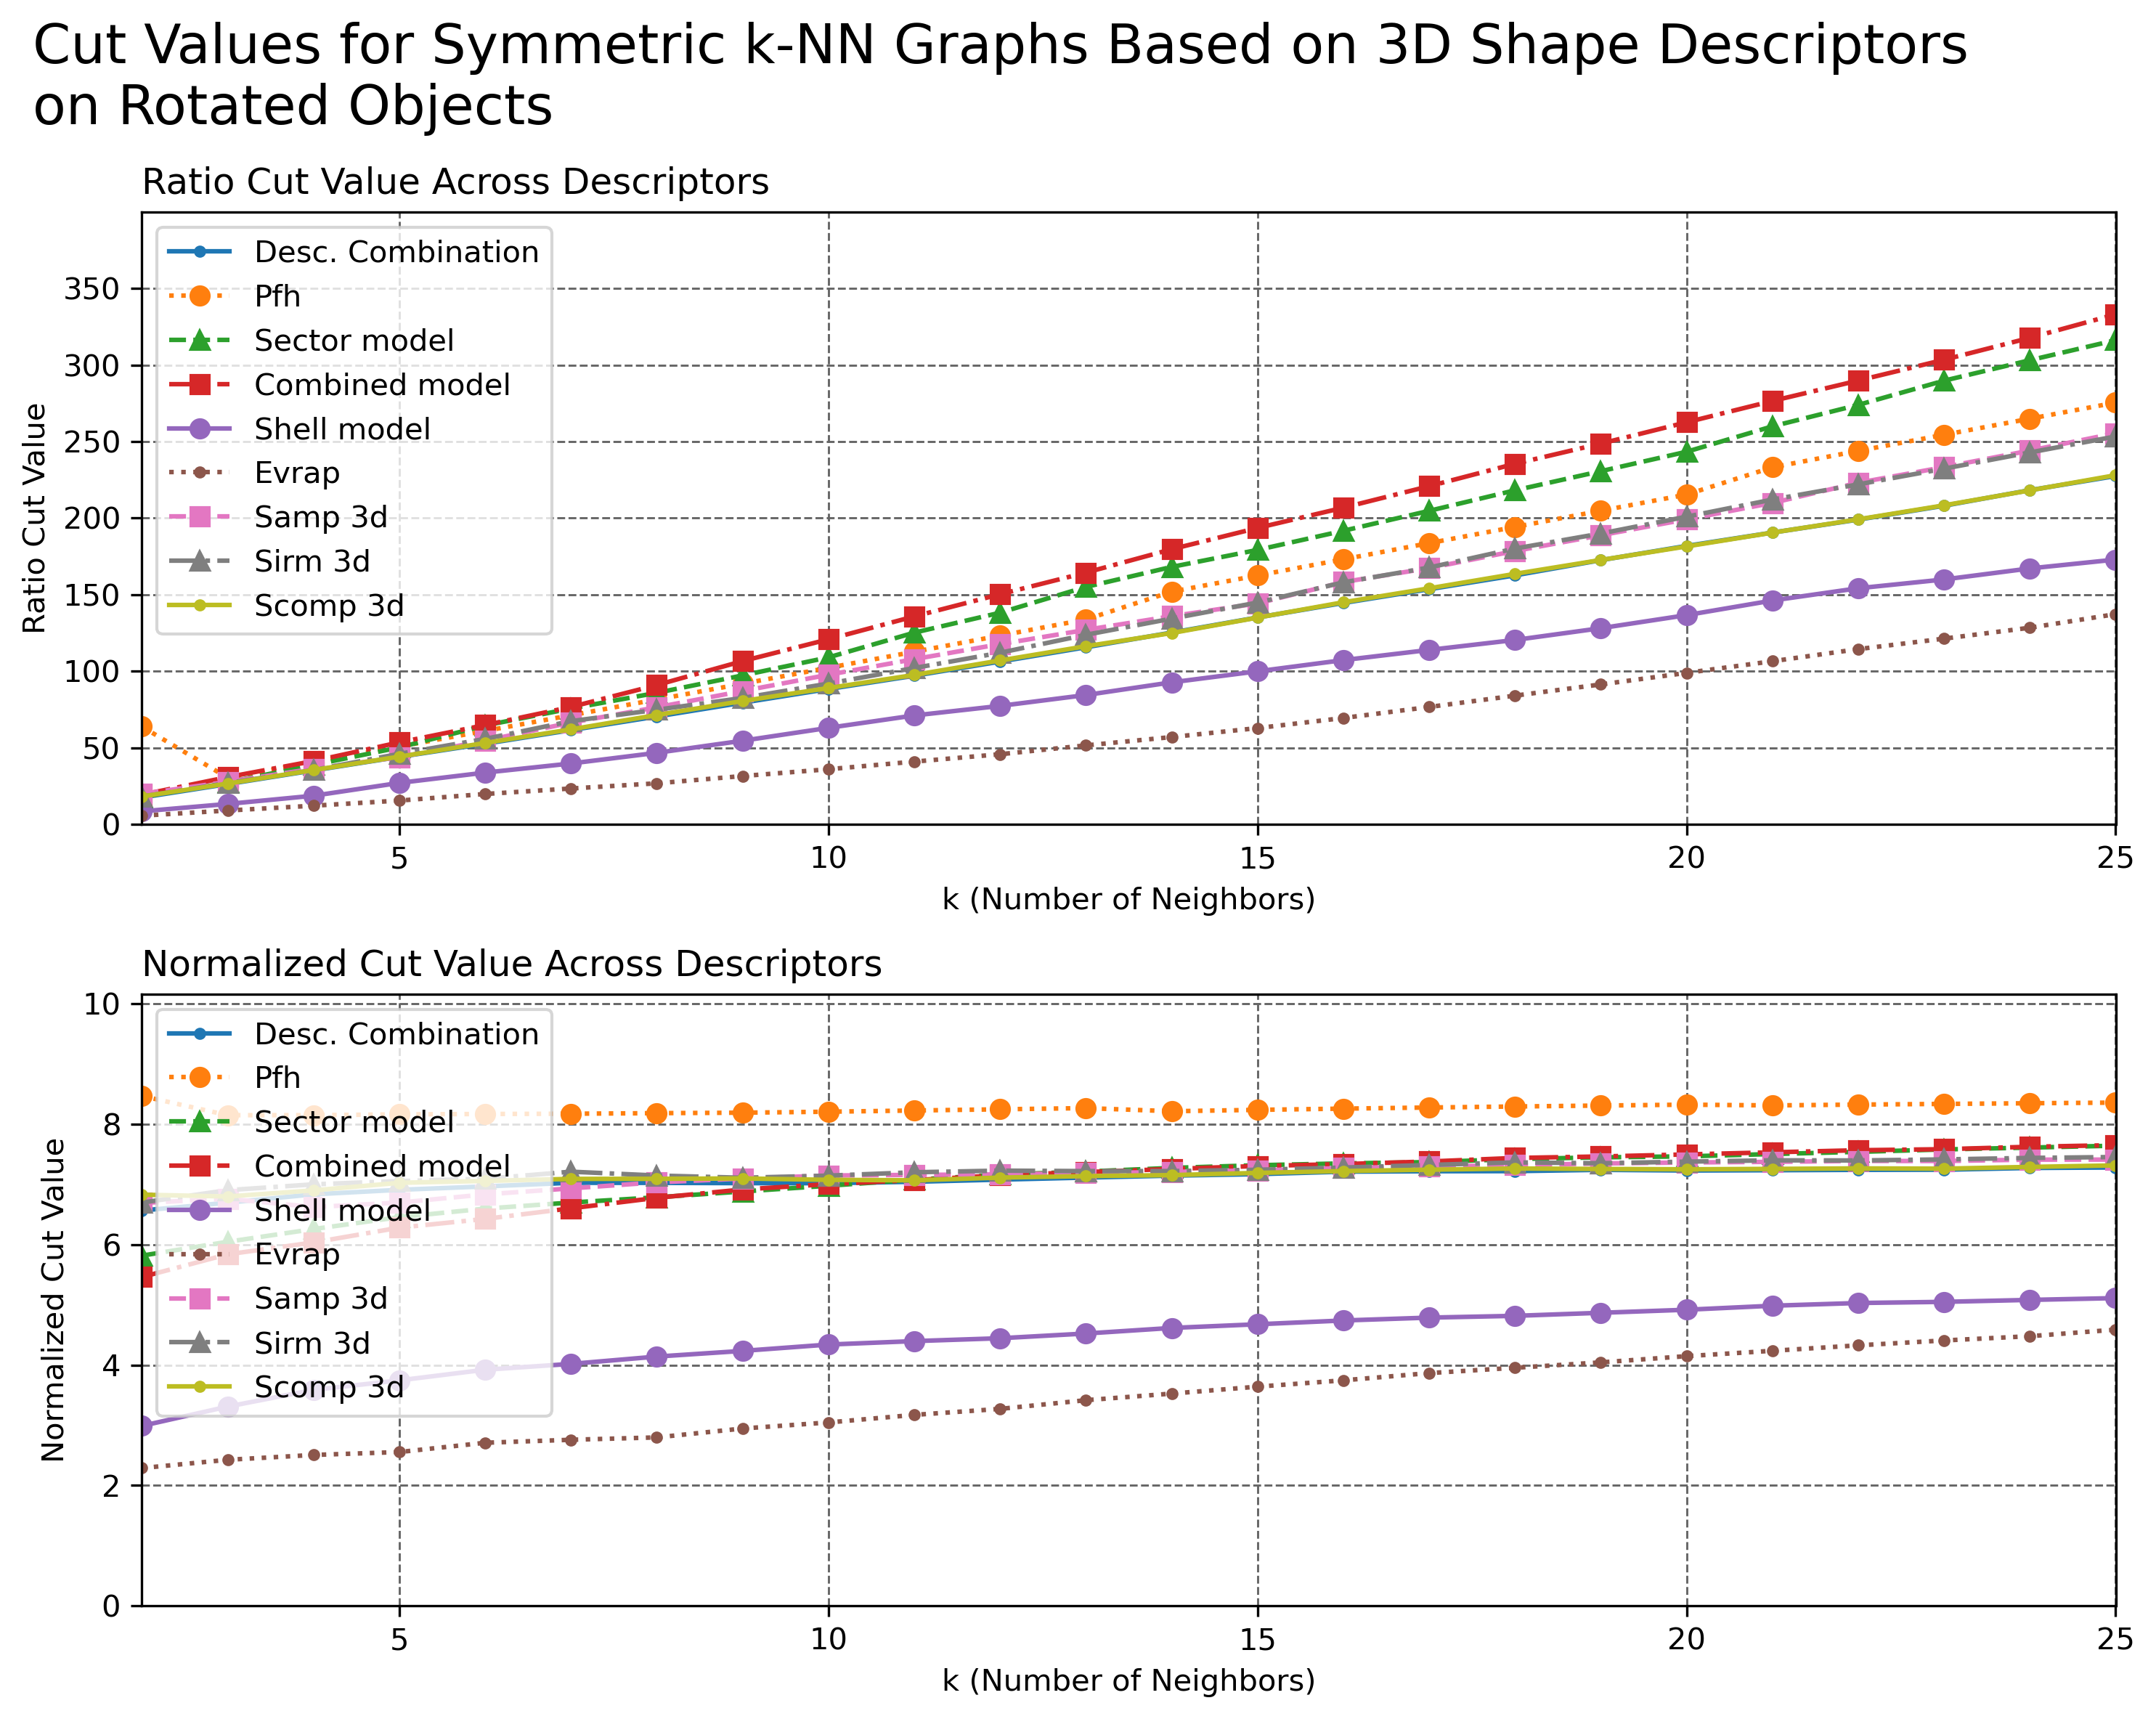

In [62]:
for knn_type in knn_types:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), dpi=300)  # Example with a 2x2 grid of subplots

    plot_evaluation(axes[0], descriptors, plot_data[knn_type]['ratio_cut'], k_values,
                    x_label='k (Number of Neighbors)', y_label='Ratio Cut Value',
                    title='Ratio Cut Value Across Descriptors')

    plot_evaluation(axes[1], descriptors, plot_data[knn_type]['normalized_cut'], k_values,
                    x_label='k (Number of Neighbors)', y_label='Normalized Cut Value',
                    title='Normalized Cut Value Across Descriptors')

    fig.suptitle(f"Cut Values for {knn_type.capitalize()} k-NN Graphs Based on 3D Shape Descriptors \non Rotated Objects",
                 color="black", fontsize=18, horizontalalignment='left', x=0.02)

    fig.patch.set_facecolor('#FFFFFF')
    fig.tight_layout()

    plt.savefig(
        f'figures/{file}/ratio_normalized_cut_values/{knn_type}_ratio_normalized_cut_per_k{"_rotated" if rotated else ""}.png',
        dpi=300)
    plt.show()